In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from unidecode import unidecode
import re

In [3]:
df_raw = pd.read_csv("Data/properatti.csv")
df_raw.shape

(121220, 26)

# Exploracion inicial

In [4]:
# Eliminamos las columnas que no nos interesan para el analisis
df = df_raw.drop(["Unnamed: 0", "geonames_id", "floor",
                  "country_name","properati_url","image_thumbnail","place_with_parent_names"], axis= 1).copy()

In [5]:
print(len(df.columns))
regiones = (len(df["state_name"].unique()))
df.columns

19


Index(['operation', 'property_type', 'place_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses', 'description',
       'title'],
      dtype='object')

In [6]:
# Convertimos la columna Descripcion con unicode para evitar mayusculas y acentos.
desc_unicode = df['description'].apply(lambda x: x if x is np.NaN else unidecode(x)).str.lower()

In [7]:
# Convertimos la columna titulo con unicode para evitar mayusculas y acentos.
title_unicode = df['title'].apply(lambda x: x if x is np.NaN else unidecode(x)).str.lower()

In [8]:
df["description"] = desc_unicode
df['title'] = title_unicode

In [9]:
# Buscamos filas completamente duplicadas para eliminar sobrecarga de datos
cantidad_duplicados = df.duplicated().sum()
dataset_size = df.size

print(f"Hay una cantidad de : {cantidad_duplicados} duplicados")
print(f"El tamaño del dataset original es: {dataset_size}")

Hay una cantidad de : 5284 duplicados
El tamaño del dataset original es: 2303180


In [10]:
# Por lo tanto, la cantidad de registros no duplicados es dataset_size - cantidad_duplicados*(cantidad de columnas)
q_dataset_sin_duplicados = dataset_size - cantidad_duplicados*len(df.columns)
print(f"la cantidad de registros unicos : {q_dataset_sin_duplicados} registros")

la cantidad de registros unicos : 2202784 registros


In [11]:
# df_disint es el DataFrame sin las columnas eliminadas al inicio, sin los duplicados y con descripcion transformado con unicode y lowercase
df_distint = df.drop_duplicates().copy()
df_distint["description"] = desc_unicode

In [12]:
df_distint.duplicated().sum()

0

In [13]:
# Check de quita de duplicados
df_distint.size == q_dataset_sin_duplicados

True

In [14]:
cant_prop = df_distint["property_type"].value_counts()

In [15]:
# Desglose del Dataset | Valores y graficos con subplot
print(f"Total de registros: {cant_prop.sum()} propiedades")
print("---------------------------------------")
print("Desglose del Dataset:")
print(cant_prop)

Total de registros: 115936 propiedades
---------------------------------------
Desglose del Dataset:
apartment    66490
house        39756
PH            5618
store         4072
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Grupo 4 | Properatti')

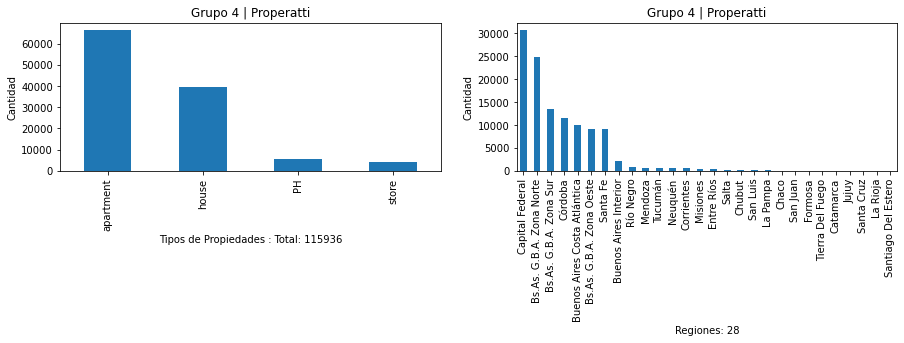

In [16]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,6)

plt.subplot(2,2,2)
df_distint.groupby("state_name")["state_name"].count().sort_values(ascending = False).plot(kind="bar")
plt.xlabel(f"Regiones: {regiones}")
plt.ylabel("Cantidad")
plt.title("Grupo 4 | Properatti")

plt.subplot(2,2,1)
df_distint.groupby("property_type")["property_type"].count().sort_values(ascending = False).plot(kind="bar")
plt.xlabel(f"Tipos de Propiedades : Total: {cant_prop.sum()}")
plt.ylabel("Cantidad")
plt.title("Grupo 4 | Properatti")


In [17]:
# Este cuando lo ordenas para que quede bien , te mueve los numeros, tendriamos q preguntar como hacerlo de otra manera.
# eliminamos esto en el compilado

# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(15,6)

# plt.subplot(2,2,1)
# x11 = df_distint["property_type"].unique()
# y11 = df_distint.groupby("property_type")["property_type"].count()
# plt.xticks(rotation=90)
# plt.bar(x11,y11,  0.8)
# plt.ylim([0,max(y11)+25000])
# # plt.xlabel("Tipos de propiedades")
# plt.ylabel("Cantidad")
# plt.title(f"TP | Grupo 4 - Cantidad de propiedades: {cant_prop.sum()}")


# for i in range(len(x11)):    
#     plt.text(i,y11[i],f"  {y11[i]}", ha="center",va="bottom", rotation = 90)


# plt.subplot(2,2,2)
# x1 = df_distint["state_name"].unique()
# y1 = df_distint.groupby("state_name")["state_name"].count()
# plt.xticks(rotation=90)
# plt.bar(x1,y1,0.8)
# plt.ylim([0,max(y1)+15000])
# # plt.xlabel("Regiones")
# plt.ylabel("Cantidad de Propiedades")
# plt.title("TP | Grupo 4 - Propiedades por Region")

# for i in range(len(x1)):    
#     plt.text(i,y1[i],f"  {y1[i]}", ha="center",va="bottom" , rotation = 90)


In [18]:
df_distint.duplicated().sum()

0

In [19]:
data = df_distint.copy()

In [20]:
# Chequeo de duplicados en el nuevo DataFrame
data.duplicated().sum()

0

In [21]:
# Porcentaje total de datos completos por campo.
(data.notnull().mean())*100

operation                     100.000000
property_type                 100.000000
place_name                     99.980161
state_name                    100.000000
lat-lon                        58.441726
lat                            58.441726
lon                            58.441726
price                          84.973606
currency                       84.972744
price_aprox_local_currency     84.973606
price_aprox_usd                84.973606
surface_total_in_m2            66.909329
surface_covered_in_m2          83.792782
price_usd_per_m2               57.612821
price_per_m2                   73.870929
rooms                          39.742617
expenses                       12.138594
description                    99.998275
title                         100.000000
dtype: float64

In [22]:
Proporcion = data["state_name"].value_counts()

In [23]:
Proporcion[0:6].sum()
print(Proporcion[0:6])
# print("-----------------------------------------------------------------------------------")
# print(f"Estas regiones representan el {round(Proporcion[0:6].sum(),2)*100} % de los datos")

Capital Federal                 30731
Bs.As. G.B.A. Zona Norte        24745
Bs.As. G.B.A. Zona Sur          13550
Córdoba                         11515
Buenos Aires Costa Atlántica     9914
Bs.As. G.B.A. Zona Oeste         9033
Name: state_name, dtype: int64


In [24]:
# Chequeo de la cantidad de propiedades por region con pivot table
data.pivot_table(index = "state_name", columns = "property_type", values =["operation"],aggfunc = np.size , margins = True,fill_value=0)

operation                               
property_type                       PH apartment  house store     All
state_name                                                           
Bs.As. G.B.A. Zona Norte           979     10067  13113   586   24745
Bs.As. G.B.A. Zona Oeste           788      3348   4645   252    9033
Bs.As. G.B.A. Zona Sur             820      5139   6959   632   13550
Buenos Aires Costa Atlántica       574      6391   2665   284    9914
Buenos Aires Interior               47       815   1316    73    2251
Capital Federal                   1807     25548   2057  1319   30731
Catamarca                            0        12     15     0      27
Chaco                                0        19     35     3      57
Chubut                               6        39    173    41     259
Corrientes                          57       139    357    21     574
Córdoba                            324      6347   4381   463   11515
Entre Ríos                           5       131    210    10     356
Formosa                              0        21     11     0      32
Jujuy                                0        10     15     1      26
La Pampa                             0        45     98    10     153
La Rioja                             0         2      2     0       4
Mendoza                              6       304    321    25     656
Misiones                             8       130    261     7     406
Neuquén                             84       272    219    11     586
Río Negro                           26       310    374    82     792
Salta                                5       127    142     2     276
San Juan                             0        16     23     1      40
San Luis                             2        31    198    14     245
Santa Cruz                           0         1     18     1      20
Santa Fe                            76      6826   1917   200    9019
Santiago Del Estero                  0         1      3     0       4
Tierra Del Fuego                     0        12     16     3      31
Tucumán                              4       387    212    31     634
All                               5618     66490  39756  4072  115936

In [25]:
data_pivot = data.pivot_table(index = "state_name", columns = "property_type", values =["operation"],aggfunc = np.size , margins = True,fill_value=0)

In [26]:
d_pivot = data_pivot["operation"].copy()

In [27]:
# d_pivot.drop("All",axis=0 , inplace = True)
d_pivot.drop("All",axis=1 , inplace = True)

<AxesSubplot:xlabel='state_name'>

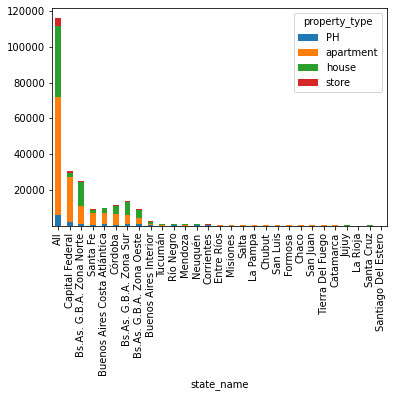

In [28]:
d_pivot.sort_values(["apartment","house"], inplace = True , ascending = False)
d_pivot.plot.bar(stacked = True)

In [29]:
d_pivot_columns = d_pivot.columns
d_pivot_values = d_pivot.values
# print(d_pivot_values,d_pivot_columns)
d_pivot_values[0]

array([ 5618, 66490, 39756,  4072])

In [30]:
# Tipos de moneda
data["currency"].unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [31]:
data["currency"].value_counts()

USD    85871
ARS    12640
PEN        2
UYU        1
Name: currency, dtype: int64

In [32]:
# Quizas estos primero los tenemos que convertir a pesos y luego a USD , la conversion a USD la esta haciendo al tipo de cambio
# de Argentina.
data.loc[data["currency"]=="UYU",:]["description"]


107390    casa con calefaccion central, mendoza, san roq...
Name: description, dtype: object

# Limpieza y ordenamiento del data set

Completar datos faltantes

In [33]:
# Estado inicial, datos completos por campo
(data.notnull().mean())*100

operation                     100.000000
property_type                 100.000000
place_name                     99.980161
state_name                    100.000000
lat-lon                        58.441726
lat                            58.441726
lon                            58.441726
price                          84.973606
currency                       84.972744
price_aprox_local_currency     84.973606
price_aprox_usd                84.973606
surface_total_in_m2            66.909329
surface_covered_in_m2          83.792782
price_usd_per_m2               57.612821
price_per_m2                   73.870929
rooms                          39.742617
expenses                       12.138594
description                    99.998275
title                         100.000000
dtype: float64

Primera pasada para completar price_usd_m2

In [34]:
# Registros sin el precio/m2
mask_price_usd_m2 = data['price_usd_per_m2'].isnull()
data[mask_price_usd_m2].sample(10)

,operation,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,description,title
77306,sell,apartment,Almagro,Capital Federal,"-34.6207541,-58.4174562",-34.620754,-58.417456,NaN,NaN,NaN,NaN,42.0,40.0,NaN,NaN,NaN,NaN,"departamento en venta en boedo, monoambiente a...",departamento - almagro
25504,sell,apartment,Boedo,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,40.0,NaN,NaN,2.0,NaN,sc541- departamento 2 amb - sin anticipo y en ...,sc541- departamento 2 amb - sin anticipo y en ...
71092,sell,apartment,Flores,Capital Federal,"-34.6118361177,-58.4739116118",-34.611836,-58.473912,155000.0,USD,2734897.5,155000.0,NaN,80.0,NaN,1937.500000,NaN,1000.0,"super comodo y luminoso departamento de 3amb, ...","excelente 3 amb y dep con balcon, super luminso"
100354,sell,apartment,Villa Lugano,Capital Federal,NaN,NaN,NaN,149000.0,USD,2629030.5,149000.0,NaN,140.0,NaN,1064.285714,NaN,NaN,caracteristicas :* 3 dormitorios * 3 banos (1 ...,departamento - villa lugano
105897,sell,apartment,Punilla,Córdoba,NaN,NaN,NaN,287000.0,USD,5063971.5,287000.0,NaN,NaN,NaN,NaN,NaN,NaN,"departamento con sala de juegos, cordoba, puni...",departamento - villa parque siquiman
64912,sell,house,Jose Leon Suarez,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,95000.0,USD,1676227.5,95000.0,NaN,250.0,NaN,380.000000,NaN,NaN,casa multifamiliar. *en p. baja: 3 dormitorios...,venta casa 4 dormitorios
101796,sell,apartment,Rosario,Santa Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,600.0,departamento al contrafrente con balcon. terce...,departamento en centro oeste
52074,sell,apartment,Parque Chacabuco,Capital Federal,"-34.6304745667,-58.4413287688",-34.630475,-58.441329,NaN,NaN,NaN,NaN,36.0,33.0,NaN,NaN,1.0,NaN,excelente departamento a estrenardepartamento ...,venta monoambiente parque chacabuco
119937,sell,apartment,La Plata,Bs.As. G.B.A. Zona Sur,"-34.918219,-57.942501",-34.918219,-57.942501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,corredor responsable: marcelo di girolamo - c....,departamento semipiso 2 dormitorios venta la p...
45360,sell,house,Córdoba,Córdoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9400.0,NaN,NaN,NaN,6.0,NaN,desarrollada sobre 9400 m2 de terreno con fron...,venta de casa excepcional categoria frente al ...


In [35]:
#Crear copia para limpiar
price_usd_per_m2_clean = data['price_usd_per_m2'].copy()
(price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100
print('Dato price_usd_per_m2_clean cargado inicialmente: ', 100 - ((price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100))

Dato price_usd_per_m2_clean cargado inicialmente:  57.61282086668507


In [36]:
# Funcion para primera completada de precio/m2
def price_per_m2_clean (price_aprox_usd, surface_covered_in_m2, surface_total_in_m2, price_usd_per_m2):
    #hago una lista para cargar superficies, si son todos null, queda solo 1
    surfaces = [1, 1]
    if math.isnan(price_usd_per_m2):  #Si precio/m 2 es nulo ver de calcularlo
        #valido si las superficies y el precio estan cargadas, tomo la superficie máxima para calcular el precio
        if not (math.isnan(surface_total_in_m2)):
            surfaces[0] = surface_total_in_m2
        if not (math.isnan(surface_covered_in_m2)):
            surfaces[1] = surface_covered_in_m2
        #Si tengo el precio y alguna de las superficies, calculo el nuevo precio/m2
        if not (math.isnan(price_aprox_usd)) and (surfaces[0] > 1 or surfaces[1] > 1): 
            return price_aprox_usd / max(surfaces)
    return price_usd_per_m2

In [37]:
price_usd_per_m2_clean = data.apply(lambda x: price_per_m2_clean(x['price_aprox_usd'], x['surface_covered_in_m2'], 
                                                                 x['surface_total_in_m2'], x['price_usd_per_m2']), axis = 1)

In [38]:
print('price_usd_per_m2_clean cargado: ', 100 - ((price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100))

price_usd_per_m2_clean cargado:  78.11982473088601



Segunda pasada, completando datos de superficie y de precio

Primero completar datos de superficie faltante, van a superficie total

In [39]:
# Buscar los registros con numeros de superficie

patron_sup = '(?P<nsup>\d+[\,]?[\.]?\d*)\s*(?:m2|metros|sup)'
regex_sup = re.compile(patron_sup)

superficies_reg = data['description'].apply(lambda x: x if x is np.NaN else regex_sup.findall(x))
superficies_reg

0              []
1              []
2              []
3              []
4              []
           ...   
121215         []
121216      [572]
121217    [43,00]
121218         []
121219       [77]
Name: description, Length: 115936, dtype: object

In [40]:
# Funcion para convertir las listas que da findall a numero, tomar solo el maximo

def convert_float(x):
    if len(x)>0:
        x = [i.replace(',','.') for i in x]
        x = [i.replace('..','.') for i in x]
        return np.array(x, dtype=float).max()
    else:
        return np.NaN

In [41]:
surface_regex = superficies_reg.apply(lambda x: x if x is np.NaN else convert_float(x))
surface_regex.values

array([nan, nan, nan, ..., 43., nan, 77.])

In [42]:
surface_regex.isnull().value_counts()

True     82423
False    33513
Name: description, dtype: int64

In [43]:
# Máscara para ver que valores estaría completando, que no tenian la superficie de antes

np.logical_and(data['surface_covered_in_m2'].isnull(), surface_regex.notnull()).value_counts()

False    111384
True       4552
dtype: int64

In [44]:
# Combinar la superficie extraida del regex con la existente

surface_covered_in_m2_clean_2 = data['surface_covered_in_m2'].copy()
surface_covered_in_m2_clean_2.loc[np.logical_and(data['surface_covered_in_m2'].isnull(), surface_regex.notnull())] = surface_regex

A continuación intentaremos completar la mayor cantidad posible de precios en USD faltantes

In [45]:
data['price_aprox_usd'].isnull().sum()

17421

In [46]:
#% de no nulos:
perc_notnull_precios_inicial = data['price_aprox_usd'].notnull().sum()*100 / data.shape[0]
perc_notnull_precios_inicial

84.97360612751864

Busqueda de precios en Title para registros con precios nulos (luego se realizará sobre Description) Se comienza sobre Title ya que la información de precios es más accesible que en Description.

In [47]:
title_serie = data['title']

In [48]:
title_serie.sample(15)

85690                 a estrenar- 1 dormitorio con pileta.
84925                         departamento - nueva cordoba
67610                                   casa - yerba buena
89654    departamento de 3 ambientes en venta con renta!!!
39062         venta casa en estancias del pilar/champagnat
22092        departamento 3 amb. sgo del estero y peatonal
79488                                       monteagudo 135
82575                                casa - tafi del valle
99202                                departamento en venta
65322                                 casa en luis guillon
20615                                departamento en venta
91926                                departamento en zaduh
37318                                departamento en venta
27629    casa 253m2 con 2 plantas en rodo, j. e. 1500, ...
63015    ideal inversor c/renta torre palmeras 3 amb 12...
Name: title, dtype: object

In [49]:
usd_pattern_title = "(?:usd|us\$|u\$s|us|u\$d|dolares)(?:\s)(?P<Price_usd>\d+[\.]?[\,]?\d*)"
usd_title_regex = re.compile(usd_pattern_title)

In [50]:
title_uni_lower_match = title_serie.apply(lambda x:  x if x is np.NaN else usd_title_regex.search(x))

In [51]:
title_uni_lower_match

0         None
1         None
2         None
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: title, Length: 115936, dtype: object

In [52]:
mask_title_usd_match_notnull = title_uni_lower_match.notnull()

In [53]:
mask_null_precios = data['price_aprox_usd'].isnull()

In [54]:
mask_title_usd = np.logical_and(mask_title_usd_match_notnull, mask_null_precios)
#Aplicamos ambas máscaras, ya que solo nos interesa completar los registros nulos de price_aprox_usd

In [55]:
title_uni_lower_match[mask_title_usd] 

1665      <re.Match object; span=(0, 11), match='u$d 260...
1666      <re.Match object; span=(0, 11), match='u$d 115...
1667      <re.Match object; span=(0, 11), match='u$d 740...
1669      <re.Match object; span=(0, 11), match='u$d 740...
1677      <re.Match object; span=(0, 11), match='u$d 115...
                                ...                        
50055     <re.Match object; span=(57, 67), match='u$s 10...
50056     <re.Match object; span=(57, 67), match='u$s 23...
50057     <re.Match object; span=(49, 59), match='u$s 18...
79472     <re.Match object; span=(38, 49), match='u$s 30...
103676    <re.Match object; span=(71, 81), match='u$s 55...
Name: title, Length: 2167, dtype: object

In [56]:
data.loc[mask_title_usd, "PriceUSD_Clean"] = title_uni_lower_match[mask_title_usd].apply(lambda x: x.group("Price_usd"))

In [57]:
data.loc[mask_title_usd, ["price_aprox_usd", "PriceUSD_Clean"]]

,price_aprox_usd,PriceUSD_Clean
1665,NaN,260.000
1666,NaN,115.000
1667,NaN,740.000
1669,NaN,740.000
1677,NaN,115.000
...,...,...
50055,NaN,101000
50056,NaN,235000
50057,NaN,180000
79472,NaN,300.000


In [58]:
data.loc[mask_title_usd, ["PriceUSD_Clean"]].isnull().sum()

PriceUSD_Clean    0
dtype: int64

Pasamos el tipo de dato a Float

In [59]:
PriceUSD_Clean_float = data.loc[mask_title_usd, ["PriceUSD_Clean"]].astype('float')
PriceUSD_Clean_float

,PriceUSD_Clean
1665,260.0
1666,115.0
1667,740.0
1669,740.0
1677,115.0
...,...
50055,101000.0
50056,235000.0
50057,180000.0
79472,300.0


Aplicamos máscara booleana para encontrar los registros que figuran con valores menor a mil usd

In [60]:
mask_Price_float = (PriceUSD_Clean_float<1000)
PriceUSD_Clean_float[mask_Price_float]

,PriceUSD_Clean
1665,260.0
1666,115.0
1667,740.0
1669,740.0
1677,115.0
...,...
50055,NaN
50056,NaN
50057,NaN
79472,300.0


Multiplicamos los valores por mil para que sean numeros coherentes

In [61]:
PriceUSD_Clean_float_product = PriceUSD_Clean_float[mask_Price_float]* 1000
PriceUSD_Clean_float_product

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
50055,NaN
50056,NaN
50057,NaN
79472,300000.0


Eliminamos los NaN, ya que lo que buscamos es reescribir los valores de la columna con precios coherentes.

In [62]:
PriceUSD_Clean_float_product = PriceUSD_Clean_float_product.dropna()
PriceUSD_Clean_float_product

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
22370,125000.0
25757,35080.0
48651,68000.0
79472,300000.0


In [63]:
PriceUSD_Clean_float_product.describe() #Vemos que hay registros con valor 1000 usd (es decir que originalmente figuraban como 1 usd)

,PriceUSD_Clean
count,2162.000000
mean,191274.279833
std,153040.466345
min,1000.000000
25%,90000.000000
50%,140000.000000
75%,250000.000000
max,980000.000000


In [64]:
PriceUSD_Clean_float_product_copy=PriceUSD_Clean_float_product.copy()

Multiplicaremos los valores menores a usd 10000 por 100 para que sean numeros coherentes

In [65]:
mask_under_10000_title = PriceUSD_Clean_float_product < 10000

In [66]:
corected_values = PriceUSD_Clean_float_product.loc[mask_under_10000_title.values] * 100
corected_values.sample(10)

,PriceUSD_Clean
4151,100000.0
2414,110000.0
2327,100000.0
2919,130000.0
2006,100000.0
2246,440000.0
2681,100000.0
1709,100000.0
1796,169000.0
1936,123400.0


In [67]:
mask_index_corected_values = corected_values.index
PriceUSD_Clean_float_product_copy.loc[mask_index_corected_values] = corected_values
PriceUSD_Clean_float_product_copy

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
22370,125000.0
25757,35080.0
48651,68000.0
79472,300000.0


In [68]:
PriceUSD_Clean_float_product_copy.describe()

,PriceUSD_Clean
count,2162.000000
mean,194034.923682
std,151123.847989
min,11800.000000
25%,95000.000000
50%,144000.000000
75%,250000.000000
max,980000.000000


Reescribimos los valores en la columna PriceUSD_Clean

In [69]:
data.loc[PriceUSD_Clean_float_product.index, ["PriceUSD_Clean"]] = PriceUSD_Clean_float_product_copy
data.loc[mask_title_usd, ["PriceUSD_Clean"]]

,PriceUSD_Clean
1665,260000
1666,115000
1667,740000
1669,740000
1677,115000
...,...
50055,101000
50056,235000
50057,180000
79472,300000


In [70]:
data["PriceUSD_Clean"].isnull().sum()

113769

In [71]:
data["PriceUSD_Clean"].notnull().sum()

2167

Rellenamos PriceUSD_Clean con los valores no nulos originales que tenemos de la columna price_aprox_usd

In [72]:
data.loc[data.loc[data["price_aprox_usd"].notnull(), ["price_aprox_usd"]].index, ["PriceUSD_Clean"]]= \
        data.loc[data["price_aprox_usd"].notnull(), ["price_aprox_usd"]].values
data["PriceUSD_Clean"]

0          62000
1         150000
2          72000
3          95000
4          64000
           ...  
121215    870000
121216    498000
121217    131500
121218     95900
121219    129000
Name: PriceUSD_Clean, Length: 115936, dtype: object

In [73]:
data["PriceUSD_Clean"].isnull().sum()

15254

Verificación de que la cantidad de nulos en PriceUSD_Clean es la cantidad de nulos en price_aprox_usd menos los registros rellenados:

In [74]:
data["price_aprox_usd"].isnull().sum() - 2167

15254

In [75]:
print('Porcentaje de no nulos inicial:', round(perc_notnull_precios_inicial,2))
print('Nuevo porcentaje de no nulos:', round(data["PriceUSD_Clean"].notnull().sum()*100/data.shape[0],2))

Porcentaje de no nulos inicial: 84.97
Nuevo porcentaje de no nulos: 86.84


Ahora se intentará rellenar la mayor cantidad posibles de precios nulos con la columna Description.

In [76]:
description_uni_lower = data['description']
description_uni_lower

0         2 ambientes tipo casa planta baja por pasillo,...
1         venta de departamento en decimo piso al frente...
2         2 ambientes 3er piso lateral living comedor am...
3         ph 3 ambientes con patio. hay 3 deptos en lote...
4         departamento con fantastica iluminacion natura...
                                ...                        
121215    torre forum alcorta - maxima categoria.impecab...
121216    excelente e impecable casa en venta en las lom...
121217    venta departamento ambiente divisible a estren...
121218    2 amb al contrafrente,  luminoso. el departame...
121219    departamento de 77 m2 apto profesional. edific...
Name: description, Length: 115936, dtype: object

In [77]:
usd_pattern_description = "(?:usd|us\$|u\$s|u\$d|dolares)(?:\s?\s?)(?P<Price_usd>\d+[\.]?[\,]?\d*)"
usd_description_regex = re.compile(usd_pattern_description)

In [78]:
description_match = description_uni_lower.apply(lambda x: x if x is np.NaN else usd_description_regex.findall(x))
description_match

0               []
1         [20.000]
2               []
3               []
4               []
            ...   
121215          []
121216          []
121217    [20.000]
121218    [95.900]
121219          []
Name: description, Length: 115936, dtype: object

In [79]:
description_match_float = description_match.apply(lambda x: x if x is np.NaN else convert_float(x))
description_match_float

0          NaN
1         20.0
2          NaN
3          NaN
4          NaN
          ... 
121215     NaN
121216     NaN
121217    20.0
121218    95.9
121219     NaN
Name: description, Length: 115936, dtype: float64

In [80]:
description_match_float.notnull().sum()

12319

In [81]:
mask_PriceUSD_Clean_null = data["PriceUSD_Clean"].isnull()

In [82]:
description_match_float[mask_PriceUSD_Clean_null]

5           NaN
20          NaN
41          NaN
62          NaN
67          NaN
          ...  
121210      NaN
121211      NaN
121212      NaN
121213      NaN
121214    1.619
Name: description, Length: 15254, dtype: float64

In [83]:
mask_description_match_notnull = description_match_float.notnull()

In [84]:
description_match_float[mask_description_match_notnull]

1          20.000
15        250.000
24        380.940
25        385.640
28        390.700
           ...   
121139      2.589
121143    305.000
121214      1.619
121217     20.000
121218     95.900
Name: description, Length: 12319, dtype: float64

In [85]:
mask_PriceUSD_Clean_null = data["PriceUSD_Clean"].isnull()

In [86]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null]

126         1.000
263       240.000
264       220.000
273         1.000
275         1.000
           ...   
120895     20.000
120897     20.000
120908     20.000
120912     20.000
121214      1.619
Name: description, Length: 656, dtype: float64

In [87]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null].describe()

count       656.000000
mean        708.372691
std        7230.408848
min           0.000000
25%           1.000000
50%           4.100000
75%          57.000000
max      150000.000000
Name: description, dtype: float64

In [88]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null].notnull().sum()

656

In [89]:
description_values_available=description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null]

Se realiza el mismo tratamiento que se efectuó en Title, con los valores menores a 1000 y 10000:

In [90]:
mask_values_under_1000_description=description_values_available<1000

In [91]:
description_values_available[mask_values_under_1000_description]

126         1.000
263       240.000
264       220.000
273         1.000
275         1.000
           ...   
120895     20.000
120897     20.000
120908     20.000
120912     20.000
121214      1.619
Name: description, Length: 623, dtype: float64

In [92]:
descriptrion_product=description_values_available*1000
descriptrion_product

126         1000.0
263       240000.0
264       220000.0
273         1000.0
275         1000.0
            ...   
120895     20000.0
120897     20000.0
120908     20000.0
120912     20000.0
121214      1619.0
Name: description, Length: 656, dtype: float64

In [93]:
description_values_available[mask_values_under_1000_description]=descriptrion_product
description_values_available[mask_values_under_1000_description]

126         1000.0
263       240000.0
264       220000.0
273         1000.0
275         1000.0
            ...   
120895     20000.0
120897     20000.0
120908     20000.0
120912     20000.0
121214      1619.0
Name: description, Length: 623, dtype: float64

In [94]:
mask_values_under_10000_description = description_values_available<10000

In [95]:
description_values_available[mask_values_under_10000_description]

126       1000.0
273       1000.0
275       1000.0
661       1000.0
1412      1000.0
           ...  
119840    1000.0
120031    1000.0
120042    1000.0
120312    1990.0
121214    1619.0
Name: description, Length: 360, dtype: float64

In [96]:
descriptrion_product2 = description_values_available[mask_values_under_10000_description]*100
descriptrion_product2

126       100000.0
273       100000.0
275       100000.0
661       100000.0
1412      100000.0
            ...   
119840    100000.0
120031    100000.0
120042    100000.0
120312    199000.0
121214    161900.0
Name: description, Length: 360, dtype: float64

In [97]:
description_values_available[mask_values_under_10000_description] = descriptrion_product2
description_values_available[mask_values_under_10000_description]

126       100000.0
273       100000.0
275       100000.0
661       100000.0
1412      100000.0
            ...   
119840    100000.0
120031    100000.0
120042    100000.0
120312    199000.0
121214    161900.0
Name: description, Length: 360, dtype: float64

In [98]:
description_values_available.describe()

count       656.000000
mean     115849.198476
std      119712.606494
min           0.000000
25%       59250.000000
50%      100000.000000
75%      100000.000000
max      900000.000000
Name: description, dtype: float64

In [99]:
data.loc[description_values_available.index, ["PriceUSD_Clean"]] = description_values_available.values
data.loc[description_values_available.index, ["PriceUSD_Clean"]]

,PriceUSD_Clean
126,100000
263,240000
264,220000
273,100000
275,100000
...,...
120895,20000
120897,20000
120908,20000
120912,20000


In [100]:
data["PriceUSD_Clean"].isnull().sum()

14598

In [101]:
print('Porcentaje de no nulos inicial:', perc_notnull_precios_inicial)
print('Nuevo porcentaje de no nulos:', data["PriceUSD_Clean"].notnull().sum()*100/data.shape[0])
print('Cantidad de precios encontrados:', data['PriceUSD_Clean'].notnull().sum() - data['price_aprox_usd'].notnull().sum())

Porcentaje de no nulos inicial: 84.97360612751864
Nuevo porcentaje de no nulos: 87.40857024565277
Cantidad de precios encontrados: 2823


In [102]:
pd.options.display.max_colwidth = 1000000

Se visualiza que en los campos donde no encontró ningun valor la regex, no se explicita un valor en dolares de la propiedad:

In [103]:
data.loc[data["PriceUSD_Clean"].isnull(),  ['description']]

,description
5,"casa en el perimetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballeria casi nagera. vista libre a terreno en frente.consta de dos dormitorios, bano, living cocina comedor integrado de buen tamano, lavadero con despensero en aluminio.patio privado con churrasquera, tapiales y puerta de acceso de servicio. frente con rejas y pequeno patio con verde, porch de acceso.gas natural en la puerta. aire acondicionado frio/calor. baulera para guardado sobre pasillo. muy buen estado en general de pisos, revestimientos, pintura, etc.apto credito. aviso publicado por pixel inmobiliario (servicio de paginas web para inmobiliarias)."
20,"consta de: comedor-cocina, cuatro dormitorios (uno con bano en suite), un bano, otro bano para terminar, cuarto de herramientas y amplio parque."
41,"""arecas"" es un complejo de duplex y departamentos de primera calidad constructiva ubicado en el mejor barrio residencial de villa carlos paz. pensamos en brindarles una opcion acorde a cada necesidad: para la persona o familia que busca su vivienda, el ahorrista que elige una vivienda en construccion para capitalizarse y el inversionista que apuesta a la excelente renta que ofrece la villa en alquileres temporarios. * financiacion: financiacion propia | max. rentabilidad 100% pesos | cuotas convenidas * ubicacion privilegiada a metros de la costanera del lago san roque . * departamentos de 1, 2 y 3 dorm. * barrio con zona comercial propia * calidad constructiva * entrega pactada* desarrollo: mp innovacion & desarrollo * comercializadora: mam inmobiliariabonificacion por pago de contado- consulte:- 351-7061857 (maria)- 86 (noelia)"
62,"casa moderna en dos plantas.pb : living con hogar, cocina-comedor diario, toilette de recepcion, lavadero y estudio, todos los pisos de ceramicos, carpinteria exterior en aluminio blanco con doble vidrio.pa: hall de distribucion, con pequeno espacio para escritorio y placard. dos dormitorios, bano compartido y suite con vestidor. todos los pisos flotantes."
67,planta alta: dormitorio en suite - balconplanta baja: 2 dormitorios - bano - cocina - living/comedor - lavadero - patio- fondo libre- entrada de auto - local con banoconsulte valor
...,...
121207,"puertos- barrio vistas - l. 88casa en venta sobre lote interno puertos, barrio vistas .planta baja , living comedor , cocina con isla movible , escritorio , cuarto de servicio , bano completo , lavadero con parrilla .planta alta , 3 dormitorios , 2 banos completos , cuarto principal con vestidor y salida a la terraza con vista al lago. toda la casa cuenta con doble vidrio ( dvh) y contramarcos , losa radiante , tratamiento plastico fino de tarquini tanto en exterior como interior , pisos de porcelanato, exterior 210 m2 de pisos en porfido , todas las mesadas de marmol , artefactos de iluminacion exterior e interior de led ."
121210,"dos viviendas en block en excelente ubicacion a 50 mts de dardo rocha y 2 cuadras de av. fleming apto vivienda, oficina, comercio, profesional, una al fte en 1 planta living comedor, cocina 2 dormitorios, bano. cochera, lavadero, jdin al fdo, atras otra vivienda en 2 plantas liv com coc bano y en la pa (no esta en plano) 2 dorm c/vestidor bano."
121211,"excelente departamento de categoria con vistas parciales al rio en exclusivo barrio cerrado ""barrancas al rio"". pallier privado, hall, toilette y guarda ropa. living y comedor con salida a balcon terraza. amplia cocina con comedor diario, dependencia de servicio, lavadero, 3 dormitorios, 2 banos, 1 en suite,gran baulera, doble cochera fija cubierta, splits frio-calor en todos los ambientes, calefaccion por piso electrico. el condominio cuenta con pileta climatizada, jardines, cocheras de cortesia, sum y seguridad 24 hs."
121212,espectacular casa estilo racionalista en calle cortada!!! tiene una renta activa hasta octubre de 2017p.b: espectacular hall de entrada con triple altura - toilette - gran living apaisado con chimenea - comedor separado (5 x 

In [104]:
data['PriceUSD_Clean'] = data['PriceUSD_Clean'].astype('float')

In [105]:
#Fin de relleno de valores nulos de precios.

In [106]:
data.columns

Index(['operation', 'property_type', 'place_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses', 'description',
       'title', 'PriceUSD_Clean'],
      dtype='object')

In [107]:
# Funcion para segunda completada de precio/m2
def price_per_m2_clean_2 (price_aprox_usd, PriceUSD_Clean, surface_covered_in_m2_clean, price_usd_per_m2):
    if math.isnan(price_usd_per_m2):  #Si precio/m 2 es nulo ver de calcularlo
        #valido si las superficies y el precio estan cargadas, tomo la superficie máxima para calcular el precio
        #Si tengo el precio y la superficie via regex calculo el nuevo precio/m2
        if not (math.isnan(price_aprox_usd)) and not (math.isnan(surface_covered_in_m2_clean)): 
            return (price_aprox_usd / surface_covered_in_m2_clean)
        elif not (math.isnan(PriceUSD_Clean)) and not (math.isnan(surface_covered_in_m2_clean)):
            return (PriceUSD_Clean / surface_covered_in_m2_clean)    
    return price_usd_per_m2

In [108]:
# Cargar las nuevas columnas a data para correr la segunda pasada de la funcion

data['surface_covered_in_m2_clean'] = surface_covered_in_m2_clean_2
data['price_usd_per_m2_clean'] = price_usd_per_m2_clean
price_usd_per_m2_clean_2 = data.apply(lambda x: price_per_m2_clean_2( x['price_aprox_usd'], x['PriceUSD_Clean'],
                                                                     x['surface_covered_in_m2_clean'], x['price_usd_per_m2_clean']), axis = 1)

In [109]:
# Ver cuando mejoró con la segunda pasada

print('price_usd_per_m2_clean cargado: ', 100 - ((price_usd_per_m2_clean_2.isnull().sum()) / price_usd_per_m2_clean_2.shape[0] * 100))

price_usd_per_m2_clean cargado:  81.59933066519459


In [110]:
price_usd_per_m2_clean_2.shape[0]

115936

In [111]:
price_usd_per_m2_clean_2.isnull().sum()

21333

In [112]:
price_usd_per_m2_clean_2.sample(10)

26325     25886.060606
74312      1800.000000
56615              NaN
36676       475.000000
5630       2627.450980
119413     3333.333333
90739              NaN
118786     1616.529412
60040              NaN
45931      2692.307692
dtype: float64

In [113]:
price_usd_per_m2_clean_2.describe()

count    9.460300e+04
mean     2.885165e+03
std      1.845555e+04
min      0.000000e+00
25%      1.205810e+03
50%      1.780000e+03
75%      2.460000e+03
max      2.600000e+06
dtype: float64

In [114]:
#mascara para ver los precios/m2 que quedan por calcular
mask_price_usd_m2_2 = price_usd_per_m2_clean_2.isnull()
data.loc[mask_price_usd_m2_2]['description'].sample(5)

120716                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ambiente amplio divisible con balcon terraza al frente - super luminoso - or. este - apto profesional - placard con puertas espejadas - cocina y bano con ventana - anafe y horno domec - split frio calor - amenities: laundry, terraza con solarium con

In [115]:
data['price_usd_per_m2_clean_2'] = (price_usd_per_m2_clean_2)

In [116]:
description_unidecode_lower = data['description']
title_unidecode_lower = data['title']

In [117]:
#BUSQUEDA DE CANTIDAD DE AMBIENTES

In [118]:
#busqueda de ambientes por numeros escritos en descripcion
pattern_ambientes_escritos = "(?P<cant_escrito>mono|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*(?:amb)"
regex_ambientes_escritos = re.compile(pattern_ambientes_escritos)
resultado_descripcion_escritos = description_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_escritos.findall(x))
resultado_descripcion_escritos

0             []
1             []
2             []
3             []
4             []
           ...  
121215        []
121216        []
121217    [mono]
121218        []
121219        []
Name: description, Length: 115936, dtype: object

In [119]:
#pasaje de numeros escritos a no escritos
dic_num_escrito = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,9:9,10:10,'mono':1, 'un': 1, 'uno': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez': 10}    
def convert_numero_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = dic_num_escrito[i]
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

ambientes_reemplazo_numeros_descripcion = resultado_descripcion_escritos.apply(lambda x: x if x is np.NaN else convert_numero_escrito(x))
ambientes_reemplazo_numeros_descripcion

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
121215    NaN
121216    NaN
121217    1.0
121218    NaN
121219    NaN
Name: description, Length: 115936, dtype: float64

In [120]:
#busqueda de ambientes por numeros no escritos en descripcion
pattern_ambientes_num = "(?P<cant_num>\d+)\s*(?:amb|monoamb)"
regex_ambientes_num = re.compile(pattern_ambientes_num)
resultado_descripcion_num = description_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_num.findall(x))
resultado_descripcion_num

0         [2]
1          []
2         [2]
3         [3]
4          []
         ... 
121215     []
121216     []
121217     []
121218    [2]
121219     []
Name: description, Length: 115936, dtype: object

In [121]:
# pasaje a int  
def convert_numero_no_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = int(i)
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

cantidad_ambientes_descripcion_num = resultado_descripcion_num.apply(lambda x: x if x is np.NaN else convert_numero_no_escrito(x))
cantidad_ambientes_descripcion_num

0         2.0
1         NaN
2         2.0
3         3.0
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218    2.0
121219    NaN
Name: description, Length: 115936, dtype: float64

In [122]:
#Cantidad total de matches
ambientes_reemplazo_numeros_descripcion.notnull().sum()+cantidad_ambientes_descripcion_num.notnull().sum()

50586

In [123]:
#busqueda de ambientes por numeros escritos en title
pattern_ambientes_escritos = "(?P<cant>mono|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*(?:amb)"
regex_ambientes_escritos = re.compile(pattern_ambientes_escritos)
resultado_title_escritos = title_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_escritos.findall(x))
#datos_de_ambientes_en_title_escritos = resultado_title_escritos[resultado_title_escritos.notnull()]
#cantidad_ambientes_title_escritos
resultado_title_escritos

0         []
1         []
2         []
3         []
4         []
          ..
121215    []
121216    []
121217    []
121218    []
121219    []
Name: title, Length: 115936, dtype: object

In [124]:
#pasaje de numeros escritos a no escritos
dic_num_escrito = {1:1,2:2,3:3,4:4,5:5,8:8,6:6,7:7,'mono':1, 'un': 1, 'uno': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez': 10}    
def convert_numero_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = dic_num_escrito[i]
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

ambientes_reemplazo_numeros_title = resultado_title_escritos.apply(lambda x: x if x is np.NaN else convert_numero_escrito(x))
ambientes_reemplazo_numeros_title

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: title, Length: 115936, dtype: float64

In [125]:
#busqueda de ambientes por numeros no escritos en title
pattern_ambientes_num = "(?P<cant_num>\d+)\s*(?:amb|monoamb)"
regex_ambientes_num = re.compile(pattern_ambientes_num)
resultado_title_num = title_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_num.findall(x))
#datos_de_ambientes_en_descripcion_num = resultado_descripcion_num[resultado_descripcion_num.notnull()]
#cantidad_ambientes_descripcion_num
resultado_title_num

0         [2]
1          []
2         [2]
3         [3]
4         [2]
         ... 
121215    [3]
121216     []
121217     []
121218    [2]
121219     []
Name: title, Length: 115936, dtype: object

In [126]:
# pasaje a int  
def convert_numero_no_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = int(i)
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

cantidad_ambientes_title_num = resultado_title_num.apply(lambda x: x if x is np.NaN else convert_numero_no_escrito(x))
cantidad_ambientes_title_num

0         2.0
1         NaN
2         2.0
3         3.0
4         2.0
         ... 
121215    3.0
121216    NaN
121217    NaN
121218    2.0
121219    NaN
Name: title, Length: 115936, dtype: float64

In [127]:
#Cantidad total de matches
ambientes_reemplazo_numeros_title.notnull().sum()+cantidad_ambientes_title_num.notnull().sum()

26856

In [128]:
data.loc[:,'amb_clean_descr_escritos'] = ambientes_reemplazo_numeros_descripcion
data.loc[:,'amb_clean_descr_no_escritos'] = cantidad_ambientes_descripcion_num
data.loc[:,'amb_clean_title_escritos'] = ambientes_reemplazo_numeros_title
data.loc[:,'amb_clean_title_no_escritos'] = cantidad_ambientes_title_num

In [129]:
def elegir_cant_amb (rooms, escr_descr, no_escr_descr, escr_title, no_escr_title):
    if math.isnan(rooms):  
        if not (math.isnan(no_escr_title)):
            rooms = no_escr_title
            return rooms
        if not (math.isnan(escr_title)):
            rooms = escr_title
            return rooms
        if not (math.isnan(no_escr_descr)):
            rooms = no_escr_descr
            return rooms
        if not (math.isnan(escr_descr)):
            rooms = escr_descr
            return rooms
    return rooms



ambientes_clean = data.apply(lambda x: elegir_cant_amb(x['rooms'], x['amb_clean_descr_escritos'], 
                                                                 x['amb_clean_descr_no_escritos'], x['amb_clean_title_escritos'], x['amb_clean_title_no_escritos']), axis = 1)

In [130]:
data.loc[:,'cant_ambientes_clean'] = ambientes_clean

In [131]:
data.head()

,operation,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,title,PriceUSD_Clean,surface_covered_in_m2_clean,price_usd_per_m2_clean,price_usd_per_m2_clean_2,amb_clean_descr_escritos,amb_clean_descr_no_escritos,amb_clean_title_escritos,amb_clean_title_no_escritos,cant_ambientes_clean
0,sell,PH,Mataderos,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,...,2 amb tipo casa sin expensas en pb,62000.0,40.0,1127.272727,1127.272727,NaN,2.0,NaN,2.0,2.0
1,sell,apartment,La Plata,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,...,venta depto 2 dorm. a estrenar 7 e/ 36 y 37,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,...,2 amb 3er piso con ascensor apto credito,72000.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,2.0,2.0
3,sell,PH,Liniers,Capital Federal,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,...,ph 3 amb. cfte. reciclado,95000.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0
4,sell,apartment,Centro,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,...,depto 2 amb al contrafrente zona centro/plaza mitre,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,2.0,2.0


In [132]:
data['rooms'].notnull().sum()/data.shape[0]

0.39742616616064036

In [133]:
data['cant_ambientes_clean'].notnull().sum()/data.shape[0]

0.6313138283190726

In [134]:
#Fin de busqueda de cant de ambientes 

In [135]:
data_clean = data.copy()
data_clean = data_clean.drop(columns = ['lat-lon', 'lon', 'lat', 'price', 'price_aprox_local_currency', 'price_per_m2', 'price_aprox_usd',
                                        'surface_total_in_m2', 'surface_covered_in_m2', 'expenses', 'currency', 'price_usd_per_m2', 
                                        'price_usd_per_m2_clean','amb_clean_descr_escritos','amb_clean_descr_no_escritos', 'amb_clean_title_escritos',
                                        'amb_clean_title_no_escritos'])
(data_clean.notnull().sum()/data_clean.shape[0])*100

operation                      100.000000
property_type                  100.000000
place_name                      99.980161
state_name                     100.000000
rooms                           39.742617
description                     99.998275
title                          100.000000
PriceUSD_Clean                  87.408570
surface_covered_in_m2_clean     87.719086
price_usd_per_m2_clean_2        81.599331
cant_ambientes_clean            63.131383
dtype: float64

In [136]:
data_clean = data_clean.rename(columns = {'PriceUSD_Clean' : 'price_usd_clean', 'surface_covered_in_m2_clean' : 'surface_in_m2_clean',
                                         'price_usd_per_m2_clean_2' : 'price_usd_per_m2_clean'})

In [137]:
(data_clean.notnull().sum()/data_clean.shape[0])*100

operation                 100.000000
property_type             100.000000
place_name                 99.980161
state_name                100.000000
rooms                      39.742617
description                99.998275
title                     100.000000
price_usd_clean            87.408570
surface_in_m2_clean        87.719086
price_usd_per_m2_clean     81.599331
cant_ambientes_clean       63.131383
dtype: float64

In [138]:
data_clean.shape

(115936, 11)

# Limpieza de outliers

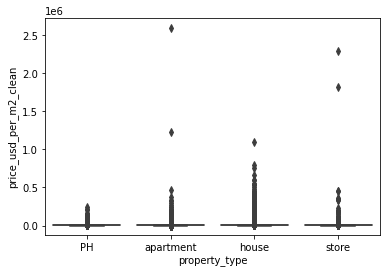

In [139]:
# Ver primero distribución de valores

sns.boxplot(data = data_clean, x = 'property_type', y = 'price_usd_per_m2_clean');

In [140]:
# Calcular los cuartiles de cada valor
price_per_m2_quantile_ph = data_clean.loc[data_clean['property_type'] == 'PH']['price_usd_per_m2_clean'].quantile([.25, .5, .75])
price_per_m2_quantile_apartment = data_clean.loc[data_clean['property_type'] == 'apartment']['price_usd_per_m2_clean'].quantile([.25, .5, .75])
price_per_m2_quantile_house = data_clean.loc[data_clean['property_type'] == 'house']['price_usd_per_m2_clean'].quantile([.25, .5, .75])
price_per_m2_quantile_store = data_clean.loc[data_clean['property_type'] == 'store']['price_usd_per_m2_clean'].quantile([.25, .5, .75])

# Armar los valores máximos para cada propiedad, tomando 1,5 por arriba del IQR
price_per_m2_max_ph = 1.5 * (price_per_m2_quantile_ph[.75] - price_per_m2_quantile_ph[.25]) + price_per_m2_quantile_ph[.75]
price_per_m2_max_apartment = 1.5 * (price_per_m2_quantile_apartment[.75] - price_per_m2_quantile_apartment[.25]) + price_per_m2_quantile_apartment[.75]
price_per_m2_max_house = 1.5 * (price_per_m2_quantile_house[.75] - price_per_m2_quantile_house[.25]) + price_per_m2_quantile_house[.75]
price_per_m2_max_store = 1.5 * (price_per_m2_quantile_store[.75] - price_per_m2_quantile_store[.25]) + price_per_m2_quantile_store[.75]

# Armar los valores minimos para cada propiedad, tomando 1,5 por abajo del IQR
price_per_m2_min_ph = price_per_m2_quantile_ph[.25] - 1.5 * (price_per_m2_quantile_ph[.75] - price_per_m2_quantile_ph[.25])
price_per_m2_min_apartment = price_per_m2_quantile_apartment[.25] - 1.5 * (price_per_m2_quantile_apartment[.75] - price_per_m2_quantile_apartment[.25])
price_per_m2_min_house = price_per_m2_quantile_house[.25] - 1.5 * (price_per_m2_quantile_house[.75] - price_per_m2_quantile_house[.25])
price_per_m2_min_store = price_per_m2_quantile_store[.25] - 1.5 * (price_per_m2_quantile_store[.75] - price_per_m2_quantile_store[.25])


In [141]:
#Filtro altos
# Armar máscaras por tipo de propiedad
mask_price_ph_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_ph), data_clean['property_type'] == 'PH' )
mask_price_apartment_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_apartment), data_clean['property_type'] == 'apartment' )
mask_price_house_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_house), data_clean['property_type'] == 'house' )
mask_price_store_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price_alto1 = np.logical_or(mask_price_ph_alto, mask_price_apartment_alto)
mask_price_alto2 = np.logical_or(mask_price_house_alto, mask_price_store_alto)
mask_price_alto = np.logical_or(mask_price_alto2, mask_price_alto1)

In [142]:
print('Datos filtrados por filtro alto:', data_clean.loc[mask_price_alto].shape[0])

Datos filtrados por filtro alto: 5305


In [143]:
#Filtro bajos
# Armar máscaras por tipo de propiedad
mask_price_ph_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_ph), data_clean['property_type'] == 'PH' )
mask_price_apartment_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_apartment), data_clean['property_type'] == 'apartment' )
mask_price_house_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_house), data_clean['property_type'] == 'house' )
mask_price_store_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price_bajo1 = np.logical_or(mask_price_ph_bajo, mask_price_apartment_bajo)
mask_price_bajo2 = np.logical_or(mask_price_house_bajo, mask_price_store_bajo)
mask_price_bajo = np.logical_or(mask_price_bajo1, mask_price_bajo2)

In [144]:
print('Datos filtrados por filtro bajo:', data_clean.loc[mask_price_bajo].shape[0])

Datos filtrados por filtro bajo: 60


In [145]:
# Filtro para quedarse solo con los indices de las filas verdaderas
filtro_precio_alto = mask_price_alto.drop(mask_price_alto.loc[mask_price_alto == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio_alto.index)

filtro_precio_bajo = mask_price_bajo.drop(mask_price_alto.loc[mask_price_bajo == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio_bajo.index)

data_clean.shape

(110571, 11)

In [146]:
#Tirar los registros que no se pudieron completar ni con precio ni con superficie
#Armar un df auxiliar para hacer la copia y la pisada
data_clean_2 = data_clean.copy()
data_clean_2 = data_clean_2.loc[data_clean['surface_in_m2_clean'].notnull() & data_clean_2['price_usd_per_m2_clean'].notnull()]
data_clean = data_clean_2.copy()
data_clean.notnull().mean()*100

operation                 100.000000
property_type             100.000000
place_name                 99.975515
state_name                100.000000
rooms                      40.644311
description                99.998834
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       65.955040
dtype: float64

In [147]:
data_clean.shape

(85766, 11)

In [148]:
# Armar nuevo indice
nuevo_indice = range(0, data_clean.shape[0])
data_clean.index = nuevo_indice

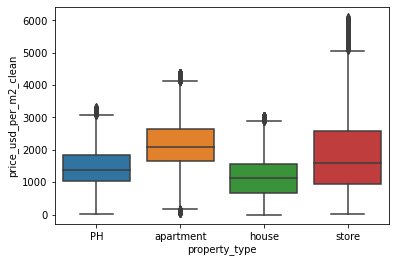

In [149]:
sns.boxplot(data = data_clean, x = 'property_type', y = 'price_usd_per_m2_clean');

# Conclusion de limpieza

In [150]:
# Estado final, datos completos por campo
(data_clean.notnull().mean())*100

operation                 100.000000
property_type             100.000000
place_name                 99.975515
state_name                100.000000
rooms                      40.644311
description                99.998834
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       65.955040
dtype: float64

In [151]:
# Numero de datos
data_clean.shape

(85766, 11)

In [152]:
print('Datos iniciales:', df_raw.shape[0])
print('Datos finales:', data_clean.shape[0])
print('Datos depurados:', round(data_clean.shape[0] / df_raw.shape[0], 4)*100, '%')

Datos iniciales: 121220
Datos finales: 85766
Datos depurados: 70.75 %


In [153]:
data_clean.dtypes

operation                  object
property_type              object
place_name                 object
state_name                 object
rooms                     float64
description                object
title                      object
price_usd_clean           float64
surface_in_m2_clean       float64
price_usd_per_m2_clean    float64
cant_ambientes_clean      float64
dtype: object

# Nuevas variables predictivas

In [154]:
# Mascaras de regex

In [155]:
# Buscar todas las menciones de pileta
patron1 = 'pileta|piscina|pisina|picina'
regex1 = re.compile(patron1, flags = re.IGNORECASE )

amenities1 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex1.search(x))
# Mascara para tener los registros que saco regex
mask_pileta = amenities1.notnull()

# Sacar los store con pileta, solo considerar casas
mask_not_store = data_clean['property_type'] != 'store'
mask_amenities1 = np.logical_and(mask_pileta, mask_not_store)


In [156]:
# para verificar que no hay negocios con pileta
data_clean.loc[mask_amenities1]['property_type'].value_counts()

house        12102
apartment    11537
PH             210
Name: property_type, dtype: int64

In [157]:
# versus lo que saco la regex
data_clean.loc[mask_pileta]['property_type'].value_counts()

house        12102
apartment    11537
PH             210
store           73
Name: property_type, dtype: int64

In [158]:
# Cargar la nueva columna al dataset
data_clean['amenities_pileta'] = mask_amenities1

In [159]:
# Buscar todas las menciones de SUM
patron2= '\sSUM\s'
regex2 = re.compile(patron2, flags = re.IGNORECASE )

amenities2 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex2.search(x))

mask_amenities2 = amenities2.notnull()
data_clean.loc[mask_amenities2].shape

(3285, 12)

In [160]:
# Cargar la nueva columna al dataset
data_clean['amenities_SUM'] = mask_amenities2

In [161]:
# Buscar todas las menciones de parrilla
patron3 = 'parrill'
regex3 = re.compile(patron3, flags = re.IGNORECASE )

amenities3 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex3.search(x))

mask_amenities3 = amenities3.notnull()
data_clean.loc[mask_amenities3].shape


(27948, 13)

In [162]:
# Cargar la nueva columna al dataset
data_clean['amenities_parrilla'] = mask_amenities3

In [163]:
# Buscar todas las menciones de garage/estacionamiento
patron4 = 'garage|estacionamiento|cochera'
regex4 = re.compile(patron4, flags = re.IGNORECASE )

amenities4 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex4.search(x))

mask_amenities4 = amenities4.notnull()
data_clean.loc[mask_amenities4].shape

(37237, 14)

In [164]:
# Cargar la nueva columna al dataset
data_clean['amenities_garage'] = mask_amenities4

# Cierre

In [165]:
# Data set inicial

In [166]:
df_raw.shape

(121220, 26)

In [167]:
# Datos completos
(df_raw.notnull().mean())*100

Unnamed: 0                    100.000000
operation                     100.000000
property_type                 100.000000
place_name                     99.981026
place_with_parent_names       100.000000
country_name                  100.000000
state_name                    100.000000
geonames_id                    84.559479
lat-lon                        57.474014
lat                            57.474014
lon                            57.474014
price                          83.162844
currency                       83.162019
price_aprox_local_currency     83.162844
price_aprox_usd                83.162844
surface_total_in_m2            67.556509
surface_covered_in_m2          83.577792
price_usd_per_m2               56.605346
price_per_m2                   72.313150
floor                           6.516251
rooms                          39.094209
expenses                       11.765385
properati_url                 100.000000
description                    99.998350
title           

In [168]:
# Data set final

In [169]:
data_clean.shape

(85766, 15)

In [170]:
# Datos completos
(data_clean.notnull().mean())*100

operation                 100.000000
property_type             100.000000
place_name                 99.975515
state_name                100.000000
rooms                      40.644311
description                99.998834
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       65.955040
amenities_pileta          100.000000
amenities_SUM             100.000000
amenities_parrilla        100.000000
amenities_garage          100.000000
dtype: float64

In [171]:
data_clean['property_type'].value_counts()

apartment    49502
house        29335
PH            4329
store         2600
Name: property_type, dtype: int64

In [172]:
mask_house = data_clean['property_type'] == 'house'
mask_apartment = data_clean['property_type'] == 'apartment'
mask_ph = data_clean['property_type'] == 'PH'
mask_store = data_clean['property_type'] == 'store'


In [173]:
surface_house = data_clean.loc[mask_house, ['surface_in_m2_clean']]
price_house = data_clean.loc[mask_house, ['price_usd_clean']]
surface_apartment = data_clean.loc[mask_apartment, ['surface_in_m2_clean']]
price_apartment = data_clean.loc[mask_apartment, ['price_usd_clean']]
surface_ph = data_clean.loc[mask_ph, ['surface_in_m2_clean']]
price_ph = data_clean.loc[mask_ph, ['price_usd_clean']]
surface_store = data_clean.loc[mask_store, ['surface_in_m2_clean']]
price_store = data_clean.loc[mask_store, ['price_usd_clean']]

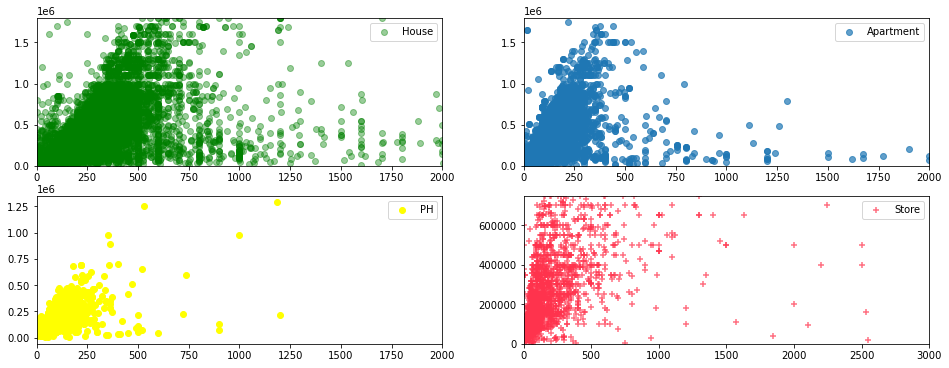

In [174]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,6)

ax[0, 0].scatter(surface_house, price_house, marker = 'o', color = "green", label='House', alpha = 0.4)
ax[0, 0].set_xlim(0, 2000)
ax[0, 0].set_ylim(0, 1800000)

ax[0, 1].scatter(surface_apartment, price_apartment, label='Apartment', alpha = 0.7);
ax[0, 1].set_xlim(0, 2000)
ax[0, 1].set_ylim(0, 1800000)

ax[1, 0].scatter(surface_ph, price_ph, label='PH', alpha = 1, color = "yellow")
ax[1, 0].set_xlim(0, 2000)

ax[1, 1].scatter(surface_store, price_store, marker = '+', color = (1.0, 0.2, 0.3), label='Store', alpha = 0.7)
ax[1, 1].set_xlim(0, 3000)
ax[1, 1].set_ylim(0, 750000)

ax[0,0].legend();
ax[0,1].legend();
ax[1,0].legend();
ax[1,1].legend();

In [175]:
mask_CABA = data_clean['state_name'] == "Capital Federal"
data_clean.loc[mask_CABA, ['place_name']].value_counts()

place_name     
Belgrano           2201
Palermo            2031
Caballito          1956
Villa Urquiza      1312
Recoleta           1226
                   ... 
Agronomía            36
Velez Sarsfield      35
Villa Soldati        14
Villa Riachuelo       4
Catalinas             3
Length: 62, dtype: int64

In [176]:
mask_belgrano = data_clean['place_name'] == 'Belgrano'
mask_palermo = data_clean['place_name'] == 'Palermo'
mask_caballito = data_clean['place_name'] == 'Caballito'
mask_villa_urquiza = data_clean['place_name'] == 'Villa Urquiza'

In [177]:
surface_belgrano = data_clean.loc[mask_belgrano, ['surface_in_m2_clean']]
price_belgrano = data_clean.loc[mask_belgrano, ['price_usd_clean']]
surface_palermo = data_clean.loc[mask_palermo, ['surface_in_m2_clean']]
price_palermo = data_clean.loc[mask_palermo, ['price_usd_clean']]
surface_caballito = data_clean.loc[mask_caballito, ['surface_in_m2_clean']]
price_caballito = data_clean.loc[mask_caballito, ['price_usd_clean']]
surface_villa_urquiza = data_clean.loc[mask_villa_urquiza, ['surface_in_m2_clean']]
price_villa_urquiza = data_clean.loc[mask_villa_urquiza, ['price_usd_clean']]

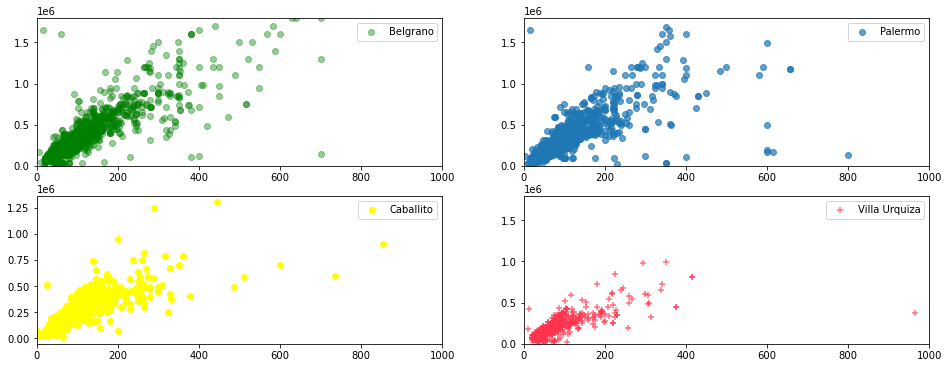

In [178]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,6)

ax[0, 0].scatter(surface_belgrano, price_belgrano, marker = 'o', color = "green", label='Belgrano', alpha = 0.4)
ax[0, 0].set_xlim(0, 1000)
ax[0, 0].set_ylim(0, 1800000)

ax[0, 1].scatter(surface_palermo, price_palermo, label='Palermo', alpha = 0.7);
ax[0, 1].set_xlim(0, 1000)
ax[0, 1].set_ylim(0, 1800000)

ax[1, 0].scatter(surface_caballito, price_caballito, label='Caballito', alpha = 1, color = "yellow")
ax[1, 0].set_xlim(0, 1000)
ax[1, 1].set_ylim(0, 1800000)

ax[1, 1].scatter(surface_villa_urquiza, price_villa_urquiza, marker = '+', color = (1.0, 0.2, 0.3), label='Villa Urquiza', alpha = 0.7)
ax[1, 1].set_xlim(0, 1000)
ax[1, 1].set_ylim(0, 1800000)

ax[0,0].legend();
ax[0,1].legend();
ax[1,0].legend();
ax[1,1].legend();